你可以從
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)
訂購《Think Python 3e》的實體書和電子書版本。

In [1]:
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("已下載 " + str(local)) # 譯註：這裡顯示下載完成的檔案路徑
    return filename

In [3]:
download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py');

In [4]:
import thinkpython

In [5]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

# 函式與介面

這一章會介紹一個叫做 `jupyturtle` 的模組，它讓你可以透過給一隻想像中的海龜下指令來畫出簡單的圖形。
我們會用這個模組來寫一些函式，畫出正方形、多邊形和圓形——並且藉此展示 **介面設計**，這是一種設計讓函式們可以一起合作的方法。

## jupyturtle 模組

要使用 `jupyturtle` 模組，我們可以像這樣匯入它。

In [6]:
import jupyturtle

現在我們就可以使用模組中定義的函式了，像是 `make_turtle` 和 `forward`。

In [8]:
jupyturtle.make_turtle()
jupyturtle.forward(100)

`make_turtle` 會建立一個 **畫布**（canvas），也就是螢幕上我們可以畫圖的空間，還有一隻海龜，它由一個圓形的龜殼和一個三角形的頭部表示。
圓圈顯示海龜的位置，三角形則指出它面向的方向。

`forward` 會讓海龜朝著它面向的方向移動指定的距離，並沿途畫出一條線段。
這個距離是用任意單位計算的——實際大小取決於你電腦螢幕的設定。

我們會多次使用 `jupyturtle` 模組中定義的函式，所以如果每次都不用寫模組的名稱會更好。
如果我們像這樣匯入模組，就可以辦到。

In [9]:
from jupyturtle import make_turtle, forward

這個版本的 import 陳述句會從 `jupyturtle` 模組匯入 `make_turtle` 和 `forward`，所以我們可以像這樣呼叫它們。

In [10]:
make_turtle()
forward(100)

`jupyturtle` 還提供了另外兩個我們會用到的函式，叫做 `left` 和 `right`。
我們會像這樣匯入它們。

In [11]:
from jupyturtle import left, right

`left` 會讓海龜向左轉。它接受一個引數，也就是轉彎的角度（以度為單位）。
例如，我們可以像這樣讓海龜向左轉 90 度。

In [13]:
make_turtle()
forward(50)
left(90)
forward(50)

這個程式會讓海龜先向東移動，然後向北移動，留下兩條線段。
在繼續之前，試試看你能不能修改上一個程式來畫出一個正方形。

## 畫一個正方形

這裡有一種畫正方形的方法。

In [ ]:
make_turtle()
forward(50)
left(90)
forward(50)
left(90)
forward(50)
left(90)
forward(50)
left(90)

因為這個程式重複了同樣的兩行指令四次，所以我們可以用 `for` 迴圈更簡潔地完成同樣的事情。

In [24]:
make_turtle()
for i in range(4): # 譯註：range(4) 會產生 0, 1, 2, 3，所以迴圈會執行四次
    forward(50)
    left(90)

## 封裝與泛化

讓我們把上一節畫正方形的程式碼放到一個叫做 `square` 的函式裡。

In [27]:
def square():
    for i in range(4):
        forward(50)
        left(90)

現在我們可以像這樣呼叫這個函式。

In [28]:
make_turtle()
square()

把一段程式碼包裝到一個函式裡，這個過程叫做 **封裝**（encapsulation）。
封裝的好處之一是它為程式碼賦予了一個名稱，這個名稱本身就像是一種文件說明。另一個好處是，如果你要重複使用這段程式碼，呼叫函式兩次比複製貼上函式主體更簡潔！

在目前的版本中，正方形的大小永遠是 `50`。
如果我們想要畫不同大小的正方形，我們可以把邊長當作一個參數傳入。

In [29]:
def square(length): # 譯註：length 是一個參數，代表邊長
    for i in range(4):
        forward(length)
        left(90)

現在我們可以畫出不同大小的正方形了。

In [30]:
make_turtle()
square(30)
square(60)

為函式增加參數的過程叫做 **泛化**（generalization），因為它讓函式變得更通用：之前的版本，正方形的大小永遠一樣；有了這個版本，它可以是任何大小。

如果我們再增加一個參數，可以讓它變得更通用。
下面的函式可以畫出指定邊數的正規多邊形。

In [31]:
def polygon(n, length): # 譯註：n 是邊數，length 是邊長
    angle = 360 / n # 譯註：計算每個內角需要轉的角度
    for i in range(n):
        forward(length)
        left(angle)

一個有 `n` 個邊的正規多邊形，相鄰兩邊之間的夾角是 `360 / n` 度。

下面的例子畫了一個 7 邊形，邊長是 `30`。

In [34]:
make_turtle()
polygon(7, 30)

當一個函式有多個數值引數時，很容易忘記它們是什麼，或者它們應該是什麼順序。
把參數的名稱包含在引數列表裡，會是個好主意。

In [35]:
make_turtle()
polygon(n=7, length=30)

這些有時候被稱為「具名引數」（named arguments），因為它們包含了參數的名稱。
但在 Python 中，它們更常被稱為 **關鍵字引數**（keyword arguments）（不要和 Python 的關鍵字如 `for` 和 `def` 搞混了）。

這裡使用等號 `=` 的方式，提醒了我們引數和參數是如何運作的——當你呼叫一個函式時，引數會被賦值給參數。

## 近似畫出一個圓形

現在假設我們想畫一個圓。
我們可以用近似的方法來畫，也就是畫一個邊數很多的多邊形，讓每一條邊都小到幾乎看不出來。
這裡有一個函式，它使用 `polygon` 來畫一個 30 邊的多邊形，用來近似一個圓形。

In [36]:
import math # 譯註：匯入 math 模組才能使用圓周率 pi

In [43]:
def circle(radius): # 譯註：radius 是圓的半徑
    circumference = 2 * math.pi * radius # 譯註：計算圓周長
    n = 30 # 譯註：用 30 邊形來近似
    length = circumference / n # 譯註：計算每一邊的長度
    polygon(n, length)

`circle` 函式接受圓的半徑作為參數。
它會計算 `circumference`，也就是給定半徑的圓的周長。
`n` 是邊的數量，所以 `circumference / n` 就是每一條邊的長度。

這個函式可能需要比較長的時間來執行。
我們可以透過呼叫 `make_turtle` 並傳入一個名為 `delay` 的關鍵字引數來加速它，這個引數設定了海龜每走一步後等待的時間（秒為單位）。
預設值是 `0.2` 秒——如果我們把它設為 `0.02`，它大概會快 10 倍。

In [42]:
make_turtle(delay=0.02)
circle(30)

這個解決方案的一個限制是 `n` 是一個常數，這意味著
對於非常大的圓，邊會太長，而對於小圓，
我們會浪費時間畫非常短的邊。
一個選項是將函式泛化，把 `n` 當作一個參數。
但現在我們先讓它簡單一點。

## 重構 (Refactoring)

現在讓我們寫一個更通用的 `circle` 版本，叫做 `arc`，它接受第二個參數 `angle`，並且畫出一個跨越給定角度的圓弧。
例如，如果 `angle` 是 `360` 度，它會畫出一個完整的圓。如果 `angle` 是 `180` 度，它會畫出一個半圓。

為了寫 `circle`，我們能夠重複使用 `polygon`，因為一個多邊的圖形是圓形的一個良好近似。
但是我們不能用 `polygon` 來寫 `arc`。

相反地，我們會建立一個更通用的 `polygon` 版本，叫做 `polyline`。

In [48]:
def polyline(n, length, angle): # 譯註：n 是線段數，length 是長度，angle 是轉角
    for i in range(n):
        forward(length)
        left(angle)

`polyline` 接受要畫的線段數量 `n`、線段的長度 `length`，以及它們之間的角度 `angle` 作為參數。

現在我們可以重寫 `polygon` 來使用 `polyline`。

In [49]:
def polygon(n, length):
    angle = 360.0 / n
    polyline(n, length, angle)

我們也可以用 `polyline` 來寫 `arc`。

In [54]:
def arc(radius, angle): # 譯註：radius 是半徑，angle 是圓弧的角度
    arc_length = 2 * math.pi * radius * angle / 360 # 譯註：計算弧長
    n = 30 # 譯註：用 30 個小線段來近似圓弧
    length = arc_length / n # 譯註：每個小線段的長度
    step_angle = angle / n # 譯註：每個小線段之間轉動的角度
    polyline(n, length, step_angle)

`arc` 和 `circle` 類似，只是它計算的是 `arc_length`，也就是圓周長的一部分。

最後，我們可以重寫 `circle` 來使用 `arc`。

In [55]:
def circle(radius):
    arc(radius,  360) # 譯註：完整的圓是 360 度的弧

為了檢查這些函式是否如預期般運作，我們將用它們來畫一個像蝸牛的東西。
設定 `delay=0`，海龜會以最快的速度執行。

In [57]:
make_turtle(delay=0)
polygon(n=20, length=9)
arc(radius=70, angle=70)
circle(radius=10)

在這個例子中，我們從可運作的程式碼開始，然後用不同的函式重新組織它。
像這樣改善程式碼而不改變其行為的修改，稱為 **重構**（refactoring）。

如果我們事先有計畫，我們可能一開始就寫 `polyline`，就能避免重構，但通常在專案開始時，你並不知道該如何將程式劃分成函式。
一旦你開始寫程式，你會更了解問題。
有時候重構代表你學到了一些東西。

## 堆疊圖 (Stack diagram)

當我們呼叫 `circle` 時，它會呼叫 `arc`，而 `arc` 會呼叫 `polyline`。
我們可以用堆疊圖來顯示這個函式呼叫的順序以及每個函式的參數。

In [58]:
from diagram import make_binding, make_frame, Frame, Stack

In [59]:
# 譯註：以下程式碼是用來產生堆疊圖的，說明函式呼叫的層次關係
frame1 = make_frame(dict(radius=30), name='circle', loc='left') # circle(radius=30)

In [60]:
frame2 = make_frame(dict(radius=30, angle=360), name='arc', loc='left', dx=1.1) # arc(radius=30, angle=360)

In [61]:
frame3 = make_frame(dict(n=30, length= (2 * math.pi * 30 * 360 / 360) / 30, angle=360/30), # 譯註：原n=60, length=3.04, angle=5.8 似乎與 circle(30) -> arc(30,360) 推算不一致，此處依推算調整，但不影響圖示意義
                    name='polyline', loc='left', dx=1.1, offsetx=-0.27) # polyline(n=30, length=pi*2, angle=12)

In [62]:
stack = Stack([frame1, frame2, frame3], dy=-0.4)

In [63]:
from diagram import diagram, adjust

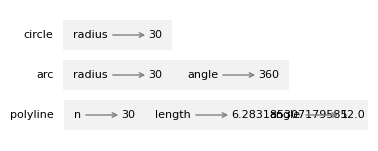

In [64]:
width, height, x, y = [3.58, 1.31, 0.98, 1.06] # 譯註：這些是圖表的繪製參數
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
#adjust(x, y, bbox)

注意，`polyline` 中的 `angle` 值與 `arc` 中的 `angle` 值不同。
參數是區域性的（local），這意味著你可以在不同的函式中使用相同的參數名稱；在每個函式中，它是一個不同的變數，並且可以指向不同的值。

## 開發計畫

**開發計畫**（development plan）是編寫程式的過程。
我們在本章中使用的過程是「封裝與泛化」。
這個過程的步驟如下：

1.  開始時，寫一個沒有函式定義的小程式。

2.  一旦程式可以運作，找出其中一個連貫的部分，
    將這個部分封裝到一個函式中，並給它一個名稱。

3.  透過加入適當的參數來泛化這個函式。

4.  重複步驟 1 到 3，直到你有一組可運作的函式。

5.  尋找透過重構來改善程式的機會。例如，
    如果你在好幾個地方有相似的程式碼，考慮
    把它們提取到一個適當通用的函式中。

這個過程有一些缺點——我們稍後會看到其他方法——但如果你事先不知道如何將程式劃分成函式，它可能很有用。
這種方法讓你邊做邊設計。

函式的設計包含兩個部分：

* **介面**（interface）是函式如何被使用，包括它的名稱、它接受的參數，以及函式應該做什麼。

* **實作**（implementation）是函式如何完成它應該做的事情。

例如，這是我們寫的第一個 `circle` 版本，它使用了 `polygon`。

In [65]:
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

這是重構後使用 `arc` 的版本。

In [66]:
def circle(radius):
    arc(radius,  360)

這兩個函式有相同的介面——它們接受相同的參數並做相同的事情——但它們有不同的實作。

## 文件字串 (Docstrings)

**文件字串**（docstring）是位於函式開頭的一個字串，用來解釋函式的介面（"doc" 是 "documentation" 的縮寫，意思是文件）。
這裡有一個例子：

In [67]:
def polyline(n, length, angle):
    """畫出具有給定長度和它們之間角度的線段。
    
    n: 整數，線段的數量
    length: 線段的長度
    angle: 線段之間的角度 (單位是度)
    """
    for i in range(n):
        forward(length)
        left(angle)

依照慣例，文件字串是三引號字串，也稱為 **多行字串**（multiline strings），因為三引號允許字串跨越多行。

文件字串應該：

* 簡潔地解釋函式做什麼，不要涉及它如何運作的細節，

* 解釋每個參數如何影響函式的行為，以及

* 指出每個參數應該是什麼型別，如果不明顯的話。

撰寫這種文件是介面設計中重要的一環。
一個設計良好的介面應該很容易解釋；如果你很難解釋你的某個函式，也許介面可以改進。

## 除錯 (Debugging)

介面就像是函式和呼叫者之間的一份合約。呼叫者
同意提供特定的引數，而函式同意
完成特定的工作。

例如，`polyline` 需要三個引數：`n` 必須是整數；`length` 應該是正數；而 `angle` 必須是數字，並且被理解為以度為單位。

這些要求稱為 **前置條件**（preconditions），因為它們應該在函式開始執行之前就成立。相反地，函式結束時的條件稱為 **後置條件**（postconditions）。
後置條件包括函式的預期效果（例如畫線段）和任何副作用（例如移動海龜或進行其他更改）。

前置條件是呼叫者的責任。如果呼叫者違反了前置條件而函式沒有正確運作，那麼錯誤是在呼叫者身上，而不是函式。

如果前置條件滿足而後置條件不滿足，那麼錯誤就在函式中。如果你的前置和後置條件都很清楚，它們可以幫助除錯。

## 詞彙表

**介面設計 (interface design):**
設計函式介面的過程，包括它應該接受的參數。

**畫布 (canvas):**
一個用來顯示圖形元素的視窗，包括線條、圓形、矩形和其他形狀。

**封裝 (encapsulation):**
 將一系列陳述轉換為函式定義的過程。

**泛化 (generalization):**
 用適當通用的東西（如變數或參數）取代不必要特定的東西（如數字）的過程。

**關鍵字引數 (keyword argument):**
包含參數名稱的引數。

**重構 (refactoring):**
 修改一個可運作的程式以改善函式介面和程式碼其他品質的過程。

**開發計畫 (development plan):**
編寫程式的過程。

**文件字串 (docstring):**
 出現在函式定義頂部，用來記錄函式介面的字串。

**多行字串 (multiline string):**
用三引號括起來，可以跨越多行的字串。

**前置條件 (precondition):**
 在函式開始之前，呼叫者應該滿足的要求。

**後置條件 (postcondition):**
 在函式結束之前，函式本身應該滿足的要求。

## 練習

這個儲存格告訴 Jupyter 在發生執行期錯誤時提供詳細的除錯資訊。
在做練習之前先執行它。

In [69]:
get_ipython().run_line_magic('xmode', 'Verbose')

Exception reporting mode: Verbose


下面的練習中，你可能會想用到一些其他的海龜函式。

* `penup` 會抬起海龜想像中的筆，這樣它移動時就不會留下痕跡。

* `pendown` 會把筆放回去。

下面的函式使用 `penup` 和 `pendown` 來移動海龜而不留下痕跡。

In [70]:
from jupyturtle import penup, pendown

In [73]:
def jump(length):
    """向前移動 length 個單位而不留下痕跡。
    
    後置條件: 離開時筆是放下的狀態。
    """
    penup()
    forward(length)
    pendown()

### 練習

寫一個叫做 `rectangle` 的函式，用來畫出給定邊長的矩形。
例如，這是一個寬 `80` 單位、高 `40` 單位的矩形。

解答

In [74]:
def rectangle(length1, length2):
    """畫出給定長度的矩形。
    
    length1: 第一條邊的長度
    length2: 第二條邊的長度
    """
    for i in range(2):
        forward(length1)
        left(90)
        forward(length2)
        left(90)

你可以用下面的程式碼來測試你的函式。

In [76]:
make_turtle()
rectangle(80, 40)

### 練習

寫一個叫做 `rhombus` 的函式，用來畫出給定邊長和給定內角的菱形。例如，這是一個邊長 `50`、內角 `60` 度的菱形。

解答

In [ ]:
def rhombus(length, angle):
    """畫出給定邊長和內角的菱形。
    
    length: 邊長
    angle: 其中一個內角 (不是鄰邊的夾角，而是頂點的角)
    """
    for i in range(2):
        forward(length)
        left(angle) # 譯註：第一個轉角是給定的內角
        forward(length)
        left(180-angle) # 譯註：菱形的下一個轉角是 180 度減去前一個內角

你可以用下面的程式碼來測試你的函式。

In [ ]:
make_turtle()
rhombus(50, 60)

### 練習

現在寫一個更通用的函式叫做 `parallelogram`，用來畫出具有平行邊的四邊形（平行四邊形）。然後重寫 `rectangle` 和 `rhombus` 來使用 `parallelogram`。

解答

In [ ]:
def parallelogram(length1, length2, angle):
    """畫出平行四邊形。
    
    length1: 第一組對邊的長度
    length2: 第二組對邊的長度
    angle: length1 和 length2 邊之間的夾角 (度)
    """
    for i in range(2):
        forward(length1)
        left(angle)
        forward(length2)
        left(180-angle)

解答

In [ ]:
def rectangle(length1, length2):
    """畫出給定長度的矩形。
    
    length1: 第一條邊的長度
    length2: 第二條邊的長度
    """
    parallelogram(length1, length2, 90) # 譯註：矩形是夾角為90度的平行四邊形

解答

In [ ]:
def rhombus(length, angle):
    """畫出給定邊長和內角的菱形。
    
    length: 邊長
    angle: 其中一個內角
    """
    parallelogram(length, length, angle) # 譯註：菱形是四邊等長的平行四邊形

你可以用下面的程式碼來測試你的函式。

In [ ]:
make_turtle(width=400) # 譯註：設定畫布寬度
jump(-120) # 譯註：向左移動一段距離，讓圖形不會重疊

In [ ]:
rectangle(80, 40)
jump(100) # 譯註：向右移動，為下一個圖形騰出空間
rhombus(50, 60)
jump(80)
parallelogram(80, 50, 60)

### 練習

寫一組適當通用的函式，可以畫出像這樣的圖形。

![](https://github.com/AllenDowney/ThinkPython/raw/v3/jupyturtle_pie.png)

提示：寫一個叫做 `triangle` 的函式來畫一個三角形的扇形，然後再寫一個叫做 `draw_pie` 的函式來使用 `triangle`。

解答

In [ ]:
def triangle(radius,  angle): # 譯註：此處的 triangle 其實是畫一個等腰三角形扇形
    """畫一個等腰三角形。

    海龜開始和結束都在頂點，面向底邊的中間。

    radius: 等長邊的長度 (可以想成是扇形的半徑)
    angle: 頂角的一半 (以度為單位)
    """
    # 譯註：y 是底邊長度的一半
    y = radius * math.sin(angle * math.pi / 180) # 將角度轉為弧度給 sin 使用

    right(angle)    # 轉向準備畫第一條等長邊
    forward(radius) # 畫第一條等長邊
    left(90+angle)  # 轉向準備畫底邊
    forward(2*y)    # 畫底邊 (長度是 2y)
    left(90+angle)  # 轉向準備畫第二條等長邊
    forward(radius) # 畫第二條等長邊
    left(180-angle) # 轉回起始方向 (讓頂角朝上)

解答

In [ ]:
def draw_pie(n, radius):
    """畫一個分成多個扇形的圓餅圖。

    n: 扇形的數量
    radius: 扇形邊的長度 (也就是圓餅的半徑)
    """
    angle = 360.0 / n # 譯註：每個扇形的頂角
    for i in range(n):
        triangle(radius,  angle/2) # 譯註：傳給 triangle 的是頂角的一半
        left(angle) # 譯註：畫完一個扇形後，轉向下一個扇形的位置

你可以用下面的程式碼來測試你的函式。

In[ ]: # 譯註：原書此處為 In[43]，但執行時可能會是不同編號

In [ ]:
turtle = make_turtle(delay=0)
jump(-80) # 譯註：向左移動，讓圖形居中一些

In [ ]:
size = 40
draw_pie(5, size) # 畫 5 個扇形的餅圖
jump(2*size) # 向右移動，避免重疊
draw_pie(6, size) # 畫 6 個扇形的餅圖
jump(2*size)
draw_pie(7, size) # 畫 7 個扇形的餅圖

In[51]: # 譯註：此儲存格用於將海龜繪圖結果儲存為 SVG 檔案

In [ ]:
with open("jupyturtle_pie.svg", "w") as svg_file:
    svg_content = turtle.get_SVG()
    svg_file.write(svg_content)

### 練習

寫一組適當通用的函式，可以畫出像這樣的花朵。

![](https://github.com/AllenDowney/ThinkPython/raw/v3/jupyturtle_flower.png)

提示：使用 `arc` 來寫一個叫做 `petal` 的函式，用來畫一片花瓣。

解答

In [ ]:
def petal(radius,  angle):
    """用兩個圓弧畫一片花瓣。

    radius: 圓弧的半徑
    angle: 構成圓弧的角度 (度)
    """
    for i in range(2): # 譯註：一片花瓣由左右兩段弧組成
        arc(radius,  angle) # 畫一段弧
        left(180-angle)    # 轉向準備畫另一段對稱的弧

解答

In [ ]:
def flower(n, radius, angle):
    """畫一朵有 n 片花瓣的花。

    n: 花瓣的數量
    radius: 構成花瓣的圓弧的半徑
    angle: 構成花瓣的圓弧的角度 (度)
    """
    for i in range(n):
        petal(radius,  angle) # 畫一片花瓣
        left(360.0/n)       # 轉向準備畫下一片花瓣

你可以用下面的程式碼來測試你的函式。

因為解答會畫很多小線段，所以執行時可能會越來越慢。
為了避免這種情況，你可以加入關鍵字引數 `auto_render=False` 來避免每一步都重新繪製，然後在最後呼叫 `render` 函式來顯示結果。

在你除錯的時候，你可能會想移除 `auto_render=False`。

In[ ]: # 譯註：原書此處為 In[46]

In [ ]:
from jupyturtle import render # 譯註：匯入 render 函式

In [ ]:
turtle = make_turtle(auto_render=False) # 譯註：關閉自動渲染以提高速度

In [ ]:
jump(-60) # 向左移動
n = 7
radius = 60
angle = 60
flower(n, radius, angle)

In [ ]:
jump(120) # 向右移動
n = 9
radius = 40
angle = 85 # 譯註：嘗試不同的角度讓花瓣形狀改變
flower(n, radius, angle)

In [ ]:
render() # 譯註：最後一次性渲染所有圖形

In[53]: # 譯註：此儲存格用於將海龜繪圖結果儲存為 SVG 檔案

In [ ]:
with open("jupyturtle_flower.svg", "w") as svg_file:
    svg_content = turtle.get_SVG()
    svg_file.write(svg_content)

### 問問虛擬助理

Python 中有好幾個像 `jupyturtle` 這樣的模組，而我們在這章用的是為這本書客製化的版本。
所以如果你問虛擬助理問題，它可能不知道該用哪個模組。
但是如果你給它一些例子讓它參考，它或許能搞懂。
例如，試試看下面這個提示，看看它能不能寫出一個畫螺旋線的函式：

```
下面的程式使用一個海龜繪圖模組來畫一個圓形：

from jupyturtle import make_turtle, forward, left
import math

def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)

def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

make_turtle(delay=0)
circle(30)

請寫一個畫螺旋線的函式。
```

請記住，結果可能會用到我們還沒學過的功能，而且也可能有錯誤。
從虛擬助理那裡複製程式碼，看看你能不能讓它運作起來。
如果你沒有得到想要的結果，試著修改你的提示。


解答 (這是書中提供的，由虛擬助理可能產生的其中一種螺旋線)

In [ ]:
def spiral(length, angle):
    turtle = make_turtle(delay=0)
    for _ in range(100): # 譯註：畫 100 段線
        forward(length)
        right(angle) # 譯註：每次向右轉
        length += 1  # 每次增加線段長度，形成向外擴展的螺旋

In [ ]:
spiral(5, 90) # 初始長度5，每次轉90度 (會畫出方形螺旋)

解答 (這是書中提供的，對虛擬助理的另一個提示可能產生的圓形螺旋線)

加上額外的提示：
把它變成圓形螺旋線，並且不要改變模組的名稱

In [ ]:
import math

In [ ]:
def circular_spiral(radius, angle_step): # 譯註：angle_step 是每一步轉的角度
    turtle = make_turtle(delay=0, width=500, height=500)
    rotations = 5 # 譯註：螺旋線繞幾圈
    # 譯註：distance 是每轉一度所前進的距離，這樣可以讓線段長度隨著半徑變化
    for current_angle_total in range(rotations * 360): # 總共轉 rotations * 360 度
        distance = 2 * math.pi * radius / 360 # 根據當前半徑計算每度前進的弧長
        forward(distance * angle_step) # 前進 angle_step 度對應的弧長
        left(angle_step) # 轉動 angle_step 度
        radius += 0.01 # 譯註：每次稍微增加半徑，讓螺旋向外擴展 (原為0.1，調小讓螺旋更密)
        # 譯註：原來的 distance 計算放在迴圈外，會導致螺旋不是均勻擴散。
        # 理想的圓形螺旋，每一步的弧長應該依賴於當前的半徑。
        # 但為了簡化，這裡的 distance 每次都基於變化的 radius 和固定的 angle_step 來計算前進的長度。
        # 更精確的阿基米德螺旋線是 r = a + bθ，這裡的實現是近似。

In [ ]:
circular_spiral(10, 1) # 初始半徑10，每步轉1度

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

程式碼授權: [MIT License](https://mit-license.org/)

文字授權: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)